<a href="https://colab.research.google.com/github/kevindavisross/stat305-f20/blob/master/Simulation_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install symbulate

In [2]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

In Symbulate, you can either operate on random variables or on simulated values.  Most of what we have done has been operations on random variables.  For example, if you want to simulate values of the sum of X and Y, you can define RVs for X and Y, *add the RVs* X + Y, then do .sim()... 

In [3]:
X, Y = RV(DiscreteUniform(1, 4) ** 2)
Z = X + Y
Z.sim(10)

0,4
1,5
2,5
3,6
4,6
5,5
6,5
7,8
8,6
...,...
9,5


But you can also simulate values of X and Y and then *add the simulated values*

HOWEVER, the following will NOT work...

In [4]:
X, Y = RV(DiscreteUniform(1, 4) ** 2)

x = X.sim(10)

y = Y.sim(10)

x + y

Exception: ignored

... Because transformations of multiple random variables like X + Y will depend on the *joint* distribution of X and Y.  So you can't just simulate values of X from its marginal distribution, simulate values of Y from its marginal distribution, and then add the simulated values.

Instead you need to first simulate X, Y pairs from the joint distribution...

In [5]:
xy = (X & Y).sim(10)

xy

0,"(3, 3)"
1,"(1, 4)"
2,"(1, 1)"
3,"(4, 1)"
4,"(4, 3)"
5,"(3, 1)"
6,"(2, 1)"
7,"(3, 1)"
8,"(1, 1)"
...,...
9,"(3, 3)"


... this basically generates a matrix with a column for each random variable.  You can access columns of the matrix with brackets.  Remember the Python uses zero-based index, so the first column is `xy[0]`

In [6]:
xy[0]

0,3
1,1
2,1
3,4
4,4
5,3
6,2
7,3
8,1
...,...
9,3


In [7]:
xy[1]

0,3
1,4
2,1
3,1
4,3
5,1
6,1
7,1
8,1
...,...
9,3


Now you can add the simulated values x of X and y of Y in a row-by-row spreasheet-like fashion

In [8]:
x = xy[0]

y = xy[1]

x + y

0,6
1,5
2,2
3,5
4,7
5,4
6,3
7,4
8,2
...,...
9,6


We didn't have to define RVs X and Y first, and we could have had more than two rolls. For example, here each outcome is a sequence of 8 rolls

In [10]:
rolls = RV(DiscreteUniform(1, 4) ** 8).sim(10)

rolls

0,"(3, 2, 2, 2, 1, ..., 3)"
1,"(3, 4, 1, 4, 1, ..., 3)"
2,"(2, 4, 4, 1, 3, ..., 3)"
3,"(2, 1, 4, 2, 1, ..., 2)"
4,"(2, 4, 4, 2, 1, ..., 1)"
5,"(4, 4, 3, 3, 2, ..., 3)"
6,"(3, 4, 3, 1, 3, ..., 3)"
7,"(2, 2, 4, 1, 2, ..., 4)"
8,"(4, 4, 3, 3, 3, ..., 2)"
...,...
9,"(4, 2, 1, 1, 3, ..., 3)"


In [11]:
rolls[4]

0,1
1,1
2,3
3,1
4,1
5,2
6,3
7,2
8,3
...,...
9,3


You can extract multiple columns

In [12]:
rolls[0, 4]

0,"(3, 1)"
1,"(3, 1)"
2,"(2, 3)"
3,"(2, 1)"
4,"(2, 1)"
5,"(4, 2)"
6,"(3, 3)"
7,"(2, 2)"
8,"(4, 3)"
...,...
9,"(4, 3)"


In [13]:
rolls[0:4]

0,"(3, 2, 2, 2)"
1,"(3, 4, 1, 4)"
2,"(2, 4, 4, 1)"
3,"(2, 1, 4, 2)"
4,"(2, 4, 4, 2)"
5,"(4, 4, 3, 3)"
6,"(3, 4, 3, 1)"
7,"(2, 2, 4, 1)"
8,"(4, 4, 3, 3)"
...,...
9,"(4, 2, 1, 1)"


You can apply functions across multiple columns

In [14]:
roll_sums = rolls.apply(sum)

roll_sums

0,16
1,22
2,22
3,20
4,19
5,23
6,19
7,21
8,24
...,...
9,20


You can define indicator-like random variables (True = 1, False = 0)

In [15]:
(roll_sums > 20)

0,False
1,True
2,True
3,False
4,False
5,True
6,False
7,True
8,True
...,...
9,False


And use indicators in transformations

In [16]:
roll_sums + 100 * (roll_sums > 20)

0,16
1,122
2,122
3,20
4,19
5,123
6,19
7,121
8,124
...,...
9,20


In [17]:
cutoff = roll_sums.quantile(0.8)

cutoff

22.2

In [19]:
roll_sums + 100 * (roll_sums > cutoff)

0,16
1,22
2,22
3,20
4,19
5,123
6,19
7,21
8,124
...,...
9,20


You can create subsets with `filter`

In [20]:
roll_sums.filter(roll_sums > 20)

0,22
1,22
2,23
3,21
4,24


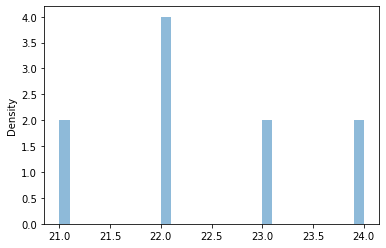

In [21]:
roll_sums.filter(roll_sums > 20).plot()